In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import trimap

def tsne(X, initial_dims=50, max_iter=2000, perplexity=30.0):
    pca = PCA(n_components=initial_dims)
    X_reduced = pca.fit_transform(X)
    tsne = TSNE(n_components=2, verbose=True, perplexity=perplexity, n_iter=max_iter)
    Y = tsne.fit_transform(X_reduced)
    return Y

In [3]:
X = np.loadtxt('data/mnist2500_X.txt')
labels = np.loadtxt('data/mnist2500_labels.txt')

In [5]:
Y_tsne = tsne(X, 50, 2000, 20.0)
Y_trimap = trimap.embed(X, 50, 2000)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.004s...
[t-SNE] Computed neighbors for 2500 samples in 0.612s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 2.335344
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.525047
[t-SNE] Error after 2000 iterations: 1.128604
Generated triplets 500 / 2500
Generated triplets 1000 / 2500
Generated triplets 1500 / 2500
Generated triplets 2000 / 2500
Generated triplets 2500 / 2500
Generated random triplets 500 / 2500
Generated random triplets 1000 / 2500
Generated random triplets 1500 / 2500
Generated random triplets 2000 / 2500
Generated random triplets 2500 / 2500
Iteration:  100, Loss: 43.189, Violated triplets: 0.1493
Iteration:  200, Loss: 26.361, Violated triplets: 0.0817
Iteration:  300, Loss: 19.218, Violated triplets: 0

In [7]:
from sklearn.neighbors import NearestNeighbors as knn

_, nbrs_input = knn(n_neighbors=50).fit(X).kneighbors(X)


array([[  0.        ,   7.93725393,   8.1240384 , ...,  10.        ,
         10.        ,  10.04987562],
       [  0.        ,   6.4807407 ,   6.63324958, ...,   8.94427191,
          9.        ,   9.        ],
       [  0.        ,   9.79795897,   9.94987437, ...,  11.3137085 ,
         11.3137085 ,  11.3137085 ],
       ..., 
       [  0.        ,   3.        ,   3.60555128, ...,   6.164414  ,
          6.244998  ,   6.244998  ],
       [  0.        ,   6.164414  ,   6.8556546 , ...,   9.43398113,
          9.48683298,   9.53939201],
       [  0.        ,   7.        ,   7.21110255, ...,   9.69535971,
          9.69535971,   9.74679434]])

# dsffsd
# fsdfsd

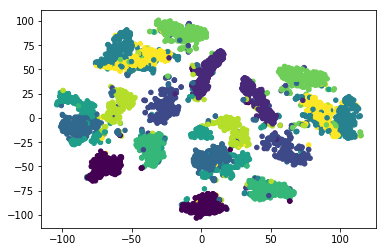

In [9]:
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], 20, labels)
plt.show()

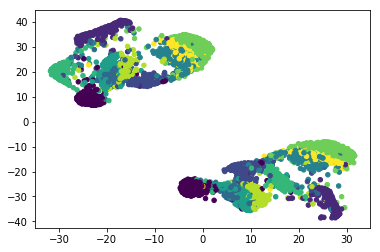

In [10]:
plt.scatter(Y_trimap[:, 0], Y_trimap[:, 1], 20, labels)
plt.show()

In [ ]:
X = np.loadtxt('data/mnist2500_X_shift.txt')
labels = np.loadtxt('data/mnist2500_labels_shift.txt'